# Project: Candlestick
Candlesticks are visual representations of price movements over a set period of time, formed by the open, high, low and close prices for that timeframe. Candlesticks convey through their shape and coloring the relationship between the open and close as well as the highs and lows for the time period.

![](pict/candlestick.png)

- https://www.strike.money/technical-analysis/types-of-candlesticks-patterns#4_Morning_Star

In [2]:
import matplotlib.pyplot as plt
import yfinance as yf

## Candlestick

In [3]:
def cs(x, open, low, high, close, details=False, linewidth=7):
    if close > open: color = 'green'
    else: color = 'red'

    plt.plot([x,x], [low, high], c=color)
    plt.plot([x,x], [open, close], c=color, linewidth=linewidth)
    if details:
        plt.text(x+0.05, high, 'high')
        plt.text(x+0.05, low , 'low')
        plt.text(x+0.05, close, 'close')
        plt.text(x+0.05, open, 'open')

        

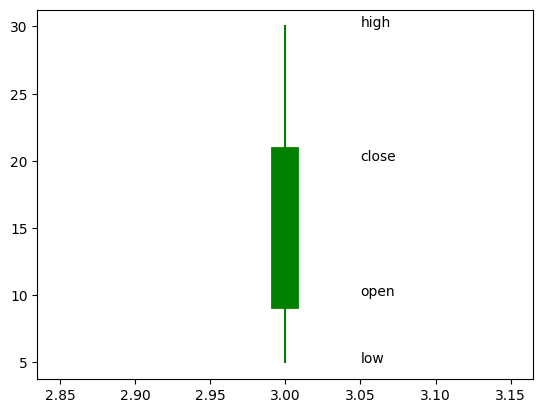

In [4]:
cs(x=3, open=10, low=5, high=30, close=20, details=True, linewidth=20)

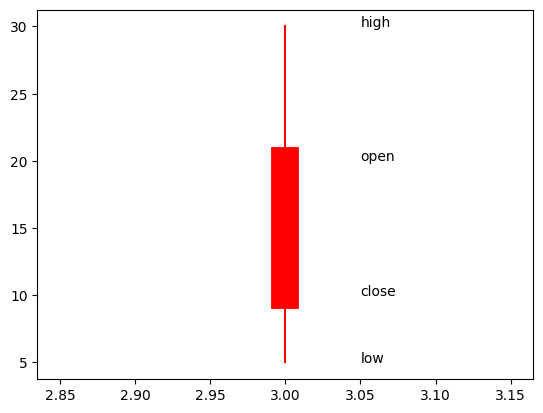

In [5]:
cs(x=3, open=20, low=5, high=30, close=10, details=True, linewidth=20)

## Data

In [6]:
start_date, end_date = '2024-1-1', '2024-5-31'
open_list = yf.Ticker('AAPL').history(start=start_date, end=end_date).Open.to_list()
low_list = yf.Ticker('AAPL').history(start=start_date, end=end_date).Low.to_list()
high_list = yf.Ticker('AAPL').history(start=start_date, end=end_date).High.to_list()
close_list = yf.Ticker('AAPL').history(start=start_date, end=end_date).Close.to_list()

In [7]:
N = len(open_list)
N

104

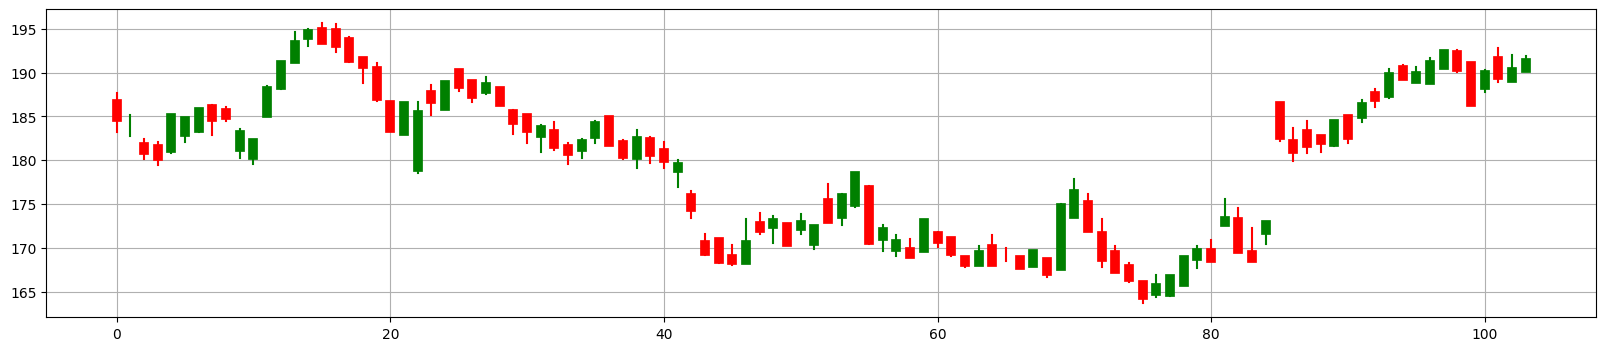

In [8]:
plt.figure(figsize=(20,4))
for i in range(N):
    cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
plt.grid()

## Candlestick Patterns 

### Bullish Engulfing
The bullish engulfing candlestick pattern is formed when the market opens lower than the previous day’s close, but then buyers step in and push the price higher, closing above the previous day’s open. 

![](pict/Bullish_Engulfing.png)
https://www.gettogetherfinance.com/blog/bullish-engulfing-pattern/

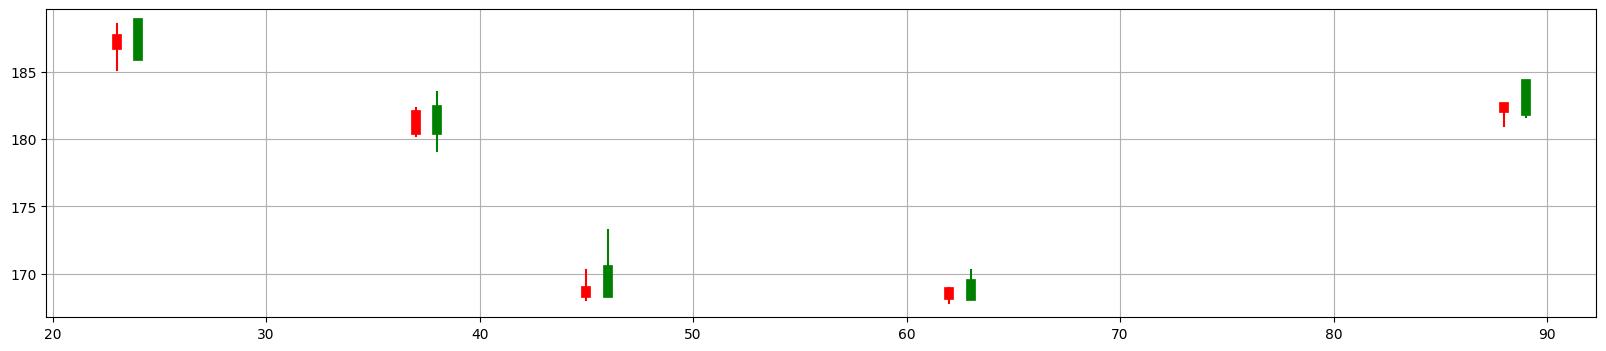

In [10]:
plt.figure(figsize=(20,4))
for i in range(N-1):
    if (open_list[i] > close_list[i]) & (open_list[i+1] < close_list[i+1]):   # red -- green
        if (close_list[i] >= open_list[i+1]) & (open_list[i] <= close_list[i+1]):
            cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
            cs(i+1, open_list[i+1], low_list[i+1], high_list[i+1], close_list[i+1])
plt.grid()

### Bullish Harami
The bullish harami candlestick pattern is a two-candle pattern. The bullish harami pattern is characterised by the formation of a small body (Green) candle before a larger body (Red) candle.

![](pict/bullish_harami.png)
https://www.chartmill.com/documentation/technical-analysis/candlestick-patterns/180-The-Bullish-Harami-Pattern-Definition

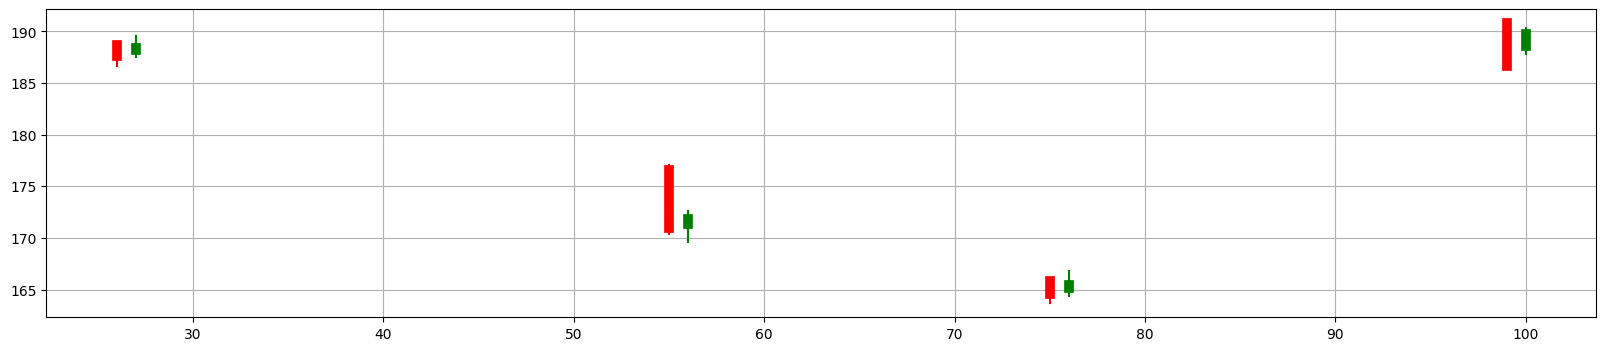

In [12]:
plt.figure(figsize=(20,4))
for i in range(N-1):
    if (open_list[i] > close_list[i]) & (open_list[i+1] < close_list[i+1]):   # red -- green
        if (close_list[i] <= open_list[i+1]) & (open_list[i] >= close_list[i+1]):
            cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
            cs(i+1, open_list[i+1], low_list[i+1], high_list[i+1], close_list[i+1])
plt.grid()

### Tweezer Bottom
The Tweezer bottom candlestick pattern is a bullish reversal pattern. The pattern consists of two or more candles with equal or identical lows forming a horizontal support level. 

![](pict/tweezer_buttom.png)
https://www.livingfromtrading.com/blog/tweezer-bottom-candlestick-pattern/

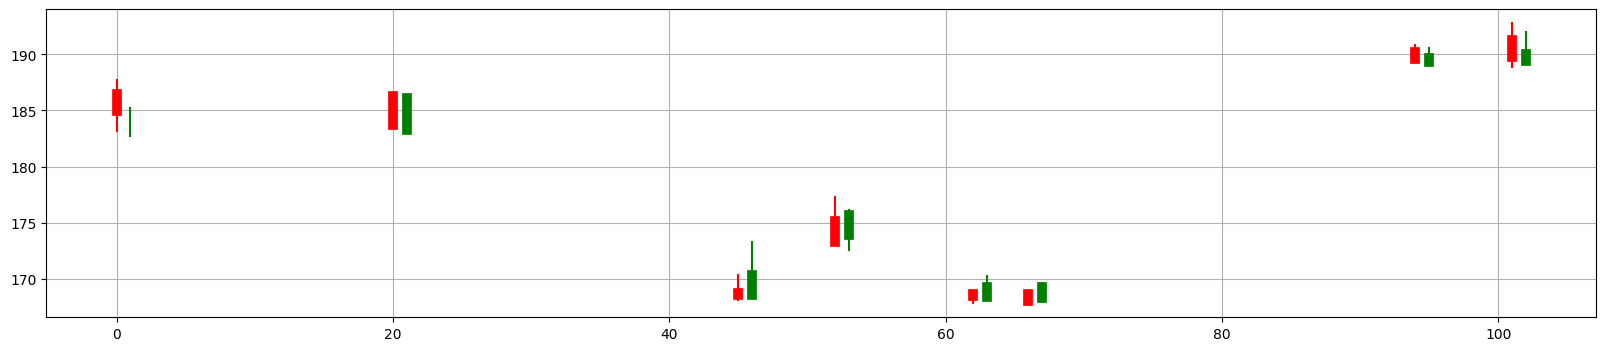

In [14]:
plt.figure(figsize=(20,4))
for i in range(N-1):
    if (open_list[i] > close_list[i]) & (open_list[i+1] < close_list[i+1]):   # red -- green
        if abs(low_list[i] - low_list[i+1]) <= low_list[i]*0.003:
            cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
            cs(i+1, open_list[i+1], low_list[i+1], high_list[i+1], close_list[i+1])
plt.grid()

### Morning Star 
A morning star doji pattern is a bullish reverse pattern that has three candles. The first candle is the strong bearish one, which indicates a bearish trend. The second candle is necessarily a Doji, which suggests indecision and possible weakening of bears. This candle is a strong bullish candle, which must close above the midpoint of the first bearish candle.
![](pict/morning_star.png)

https://www.tradingwolf.com/chart-patterns/morning-star/

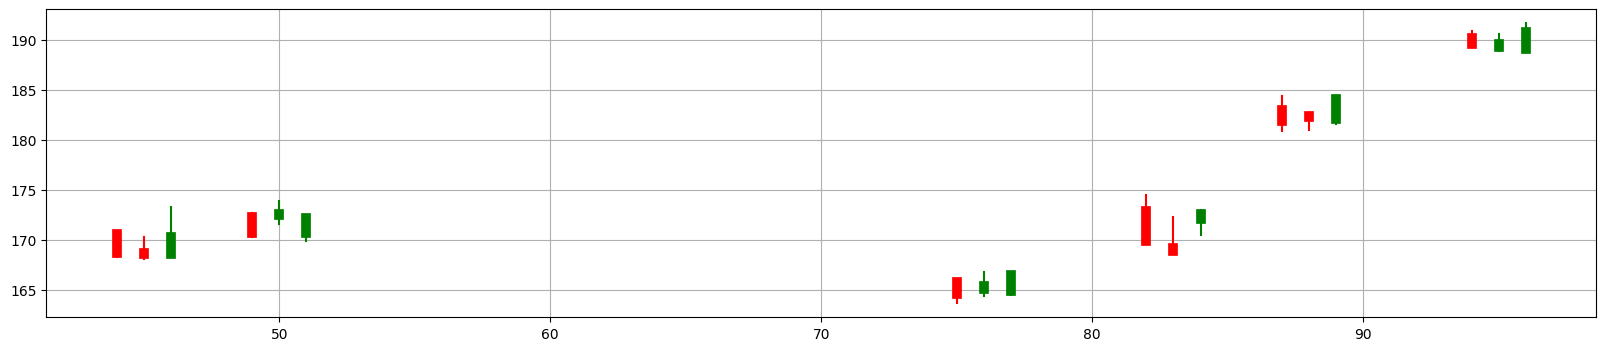

In [16]:
plt.figure(figsize=(20,4))
for i in range(N-2):
    if (open_list[i] > close_list[i]) & (abs(open_list[i+1]-close_list[i+1])<=open_list[i+1]*0.002) & (open_list[i+2] < close_list[i+2]):# red -- r/g -- green
        if close_list[i+2] > (open_list[i] + close_list[i])/2:
            cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
            cs(i+1, open_list[i+1], low_list[i+1], high_list[i+1], close_list[i+1])
            cs(i+2, open_list[i+2], low_list[i+2], high_list[i+2], close_list[i+2])

plt.grid()

### Morning Star Doji
A morning star doji pattern is a bullish reverse pattern that has three candles. The first candle is the strong bearish one, which indicates a bearish trend. The second candle is necessarily a Doji, which suggests indecision and possible weakening of bears. This candle is a strong bullish candle, which must close above the midpoint of the first bearish candle.

The key difference between the morning star pattern and the Doji morning star pattern is that the middle candlestick in the latter is a Doji, a candlestick with an open and close price that is virtually equal.

![](pict/morning_doji_star.png)

https://fxopen.com/blog/en/how-to-trade-using-the-morning-doji-star-candlestick-pattern/

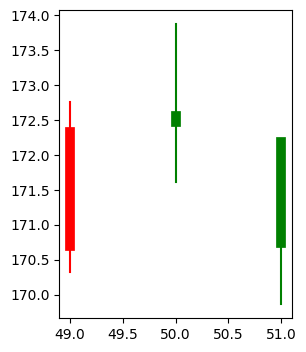

In [33]:
plt.figure(figsize=(3,4))
for i in range(N-2):
    if (open_list[i] > close_list[i]) & (abs(open_list[i+1]-close_list[i+1])<=open_list[i+1]*0.002) & (open_list[i+2] < close_list[i+2]):# red -- r/g -- green
        if close_list[i+2] > (open_list[i] + close_list[i])/2:
            if abs(open_list[i+1]-close_list[i+1]) < open_list[i+1]*0.0006:
                cs(i, open_list[i], low_list[i], high_list[i], close_list[i])
                cs(i+1, open_list[i+1], low_list[i+1], high_list[i+1], close_list[i+1])
                cs(i+2, open_list[i+2], low_list[i+2], high_list[i+2], close_list[i+2])


## Encoder

In [39]:
def encoder(hp, op, cp, lp):
    if hp  > op > cp  > lp: return 'a'
    if hp == op > cp  > lp: return 'b'
    if hp == op > cp == lp: return 'c'
    if hp  > op > cp == lp: return 'd'
        
    if hp  > cp > op  > lp: return 'e'
    if hp == cp > op  > lp: return 'f'
    if hp == cp > op == lp: return 'g'
    if hp  > cp > op == lp: return 'h'

    if hp  > op == cp  > lp: return 'i'
    if hp == op == cp  > lp: return 'j'
    if hp == op == cp == lp: return 'k'
    if hp  > op == cp == lp: return 'l' 

In [41]:
encoder(1,1,1,1)

'k'

In [43]:
def cs2(hp, op, cp, lp, x=0, details=False, linewidth=10):
    if cp > op: color = 'green'
    elif cp < op:  color = 'red'
    else: color ='black'

    plt.plot([x,x], [lp, hp], c=color)
    if cp != op:
        plt.plot([x,x], [op, cp], c=color, linewidth=linewidth)
    else:
        plt.plot([x-0.1,x+0.1], [op, cp], c=color, linewidth=2)

    if details:
        plt.text(x+0.05, high, 'high')
        plt.text(x+0.05, low , 'low')
        plt.text(x+0.05, close, 'close')
        plt.text(x+0.05, open, 'open')


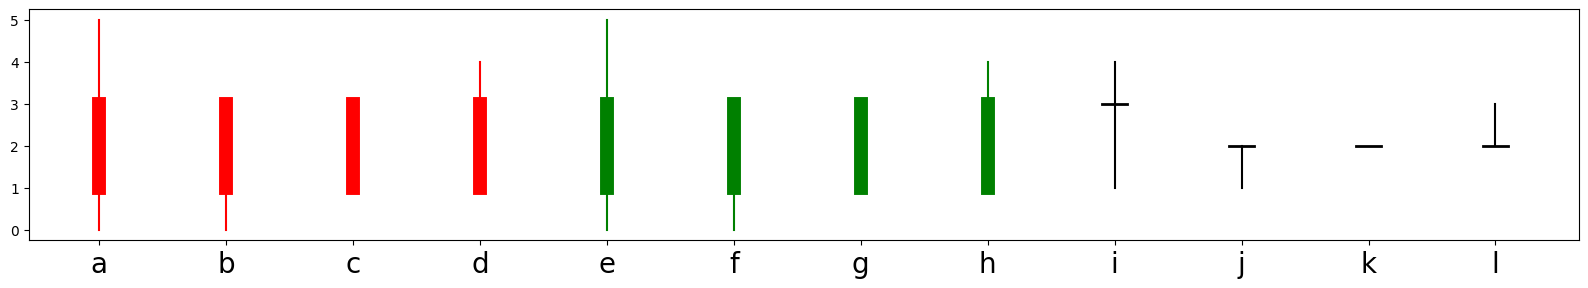

In [45]:
import string
plt.figure(figsize=(20,3))
cs(5,3,1,0, x= 1)
cs(3,3,1,0, x= 2)
cs(3,3,1,1, x= 3)
cs(4,3,1,1, x= 4)

cs(5,1,3,0, x= 5)
cs(3,1,3,0, x= 6)
cs(3,1,3,1, x= 7)
cs(4,1,3,1, x= 8)


cs(4,3,3,1, x= 9)
cs(2,2,2,1, x=10)
cs(2,2,2,2, x=11)
cs(3,2,2,2, x=12)

plt.xticks(range(1,13), list(string.ascii_lowercase[:12]), fontsize=20);

In [51]:
encoder_list = []
for i in range(len(open_list)):
    encoder_list.append(encoder(high_list[i], open_list[i], close_list[i], low_list[i]))

encoder_list[:10]

['a', 'e', 'a', 'a', 'e', 'e', 'e', 'a', 'a', 'e']

In [53]:
from collections import Counter
Counter(encoder_list)

Counter({'a': 55, 'e': 46, 'd': 2, 'f': 1})